In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

%matplotlib inline
pd.set_option('display.max_rows', 500)

datapath=r'..\data\raw\COVID-19\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_confirmed_global.csv'
pd_raw= pd.read_csv(datapath)

pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/15/22,5/16/22,5/17/22,5/18/22,5/19/22,5/20/22,5/21/22,5/22/22,5/23/22,5/24/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,179267,179321,179328,179477,179597,179624,179674,179716,179716,179771
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,275615,275621,275688,275732,275732,275732,275838,275864,275881,275939
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265818,265823,265828,265834,265841,265847,265851,265854,265855,265860
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,42156,42156,42156,42572,42572,42572,42572,42572,42572,42572
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99287,99433


In [2]:
time_idx=pd_raw.columns[4:]

In [3]:
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [4]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                            Antarctica
6                   Antigua and Barbuda
7                             Argentina
8                               Armenia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                            Australia
17                              Austria
18                           Azerbaijan
19                              Bahamas
20                              Bahrain
21                           Bangladesh
22                             Barbados
23                              Belarus
24                              Belgium


In [5]:
len(pd_raw['Country/Region'].unique())

199

In [6]:
pd_raw[pd_raw['Country/Region']=='Germany'].iloc[:,4::].sum(axis=0)[0:4]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

In [7]:
country_list=[#'Italy',
              #'US',
              #'Spain',
              #'Germany',
              #'Korea, South',
              'US','Mexico',
              'Belgium',
              'Afghanistan',
              'Netherlands'
             ] 

In [8]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

In [9]:
df_plot

,date,US,Mexico,Belgium,Afghanistan,Netherlands
0,1/22/20,1,0,0,0,0
1,1/23/20,1,0,0,0,0
2,1/24/20,2,0,0,0,0
3,1/25/20,2,0,0,0,0
4,1/26/20,5,0,0,0,0
...,...,...,...,...,...,...
849,5/20/22,83237414,5752441,4134293,179624,8259308
850,5/21/22,83262842,5752441,4134293,179674,8259308
851,5/22/22,83281329,5752441,4134293,179716,8259308
852,5/23/22,83390587,5759773,4143408,179716,8262012


<AxesSubplot:xlabel='date'>

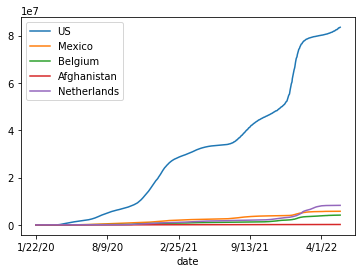

In [10]:
%matplotlib inline
df_plot.set_index('date').plot()

# Data Type Date

In [11]:
df_plot.head()

,date,US,Mexico,Belgium,Afghanistan,Netherlands
0,1/22/20,1,0,0,0,0
1,1/23/20,1,0,0,0,0
2,1/24/20,2,0,0,0,0
3,1/25/20,2,0,0,0,0
4,1/26/20,5,0,0,0,0


In [12]:
from datetime import datetime

In [13]:
df_plot.date[0]

'1/22/20'

In [14]:
datetime.strptime(df_plot.date[0],"%m/%d/%y")

datetime.datetime(2020, 1, 22, 0, 0)

In [15]:
time_idx=[datetime.strptime( each,"%m/%d/%y") for each in df_plot.date]
time_idx[0:5]

[datetime.datetime(2020, 1, 22, 0, 0),
 datetime.datetime(2020, 1, 23, 0, 0),
 datetime.datetime(2020, 1, 24, 0, 0),
 datetime.datetime(2020, 1, 25, 0, 0),
 datetime.datetime(2020, 1, 26, 0, 0)]

In [16]:
time_str=[each.strftime('%Y-%m-%d') for each in time_idx]
time_str[0:5]

['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26']

In [17]:
df_plot['date']=time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
df_plot.head()

,date,US,Mexico,Belgium,Afghanistan,Netherlands
0,2020-01-22,1,0,0,0,0
1,2020-01-23,1,0,0,0,0
2,2020-01-24,2,0,0,0,0
3,2020-01-25,2,0,0,0,0
4,2020-01-26,5,0,0,0,0


In [19]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv',sep=';',index=False)

# Relational data model - defining a primary key

In [20]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/15/22,5/16/22,5/17/22,5/18/22,5/19/22,5/20/22,5/21/22,5/22/22,5/23/22,5/24/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,179267,179321,179328,179477,179597,179624,179674,179716,179716,179771
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,275615,275621,275688,275732,275732,275732,275838,275864,275881,275939
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265818,265823,265828,265834,265841,265847,265851,265854,265855,265860
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,42156,42156,42156,42572,42572,42572,42572,42572,42572,42572
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99287,99433


In [21]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country',
                      'Province/State':'state'})

In [22]:
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/15/22,5/16/22,5/17/22,5/18/22,5/19/22,5/20/22,5/21/22,5/22/22,5/23/22,5/24/22
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,179267,179321,179328,179477,179597,179624,179674,179716,179716,179771
1,NaN,Albania,0,0,0,0,0,0,0,0,...,275615,275621,275688,275732,275732,275732,275838,275864,275881,275939
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,265818,265823,265828,265834,265841,265847,265851,265854,265855,265860
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,42156,42156,42156,42572,42572,42572,42572,42572,42572,42572
4,NaN,Angola,0,0,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99287,99433


In [23]:
pd_relational_model=pd_data_base.set_index(['state', 'country'])

In [24]:
test_pd=pd_data_base.set_index(['state', 'country']).T

In [25]:
test_pd.columns

MultiIndex([(                           nan,          'Afghanistan'),
            (                           nan,              'Albania'),
            (                           nan,              'Algeria'),
            (                           nan,              'Andorra'),
            (                           nan,               'Angola'),
            (                           nan,           'Antarctica'),
            (                           nan,  'Antigua and Barbuda'),
            (                           nan,            'Argentina'),
            (                           nan,              'Armenia'),
            ('Australian Capital Territory',            'Australia'),
            ...
            (                           nan,              'Uruguay'),
            (                           nan,           'Uzbekistan'),
            (                           nan,              'Vanuatu'),
            (                           nan,            'Venezuela'),
    

In [26]:
test_pd.stack(level=[0,1])

         state              country    
1/22/20  NaN                Afghanistan         0.0
                            Albania             0.0
                            Algeria             0.0
                            Andorra             0.0
                            Angola              0.0
                                             ...   
5/24/22  Western Australia  Australia      684326.0
         Xinjiang           China            1008.0
         Yukon              Canada           4363.0
         Yunnan             China            2136.0
         Zhejiang           China            3136.0
Length: 243390, dtype: float64

In [27]:
pd_relational_model=pd_data_base.set_index(['state','country']) \
                                .T                              \
                                .stack(level=[0,1])             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0


In [28]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [29]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [30]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [31]:
pd_relational_model.confirmed=pd_relational_model.confirmed.astype(int)

pd_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',index=False)

In [32]:
print(pd_relational_model[pd_relational_model['country']=='US'].tail())

             date state country  confirmed
242146 2022-05-20   NaN      US   83237414
242431 2022-05-21   NaN      US   83262842
242716 2022-05-22   NaN      US   83281329
243001 2022-05-23   NaN      US   83390587
243286 2022-05-24   NaN      US   83501457
